![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/SAS reto"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/SAS reto


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [3]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [4]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [2]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.5 MB/s 
  Created wheel for saspy: filename=saspy-4.4.0-py3-none-any.whl size=9937189 sha256=8b83b604bb824b6226baa2f20b249edb0483dc30eabd89c187fb1fc9c4d876c6
  Stored in directory: /root/.cache/pip/wheels/e7/67/b2/d95e4d2a4771d138cccfa28fb0814d94cf4f1548542c892412
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [15]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [20]:
%%writefile .authinfo
oda user USER password PASSWORD

Overwriting .authinfo


Copy this file to home

In [3]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [3]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/SAS reto/sascfg_personal.py")
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the OMR user id: a00827284@tec.mx
Please enter the password for OMR user : ··········
SAS Connection established. Subprocess id is 517



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SAS reto/sascfg_personal.py
WORK Path             = /saswork/SAS_work9A1E00018E79_odaws02-usw2-2.oda.sas.com/SAS_work217A00018E79_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 102009


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [4]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                   Wednesday, November 30, 2022 11:25:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                   Wednesday, November 30, 2022 11:25:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

UsageError: Cell magic `%%SAS` not found.


## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [5]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [6]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
282222,2282223.0,MILES,ANTHONY,0.0,28.0,173800.0,University / College,City,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
989175,2989176.0,FREDERICK,MARY,1.0,45.0,110400.0,University / College,Suburban,5.0,0.0,...,1.0,2.0,2.0,110.0,50.0,60.0,0.0,0.0,0.0,0.0
427210,2427211.0,BRANON,JOANN,1.0,40.0,135200.0,University / College,Rural,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
392571,2392572.0,PERSON,MARTHA,1.0,64.0,22500.0,High School,Downtown,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
616700,2616701.0,WEATHERMAN,WANDA,1.0,50.0,28000.0,University / College,City,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [7]:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import numpy                   as np

In [8]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

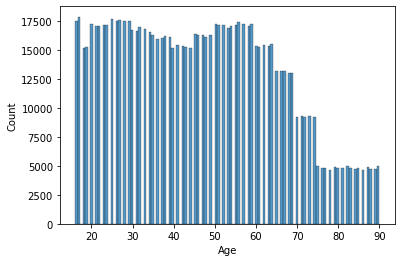

In [9]:
sns.histplot(data_merge.Age)

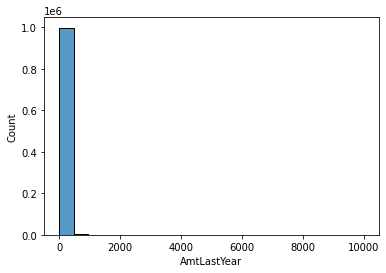

In [10]:
sns.histplot(data_merge.AmtLastYear)

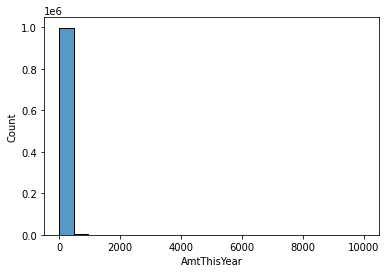

In [11]:
sns.histplot(data_merge.AmtThisYear)

In [12]:
data_merge.groupby(by ='Woman')['AmtLastYear'].sum()

Woman
0.0    3145355.0
1.0    4527660.0
Name: AmtLastYear, dtype: float64

Eliminar de la base a los que tienen un salario de 0, ya que se asume que no tienen dinero para donar

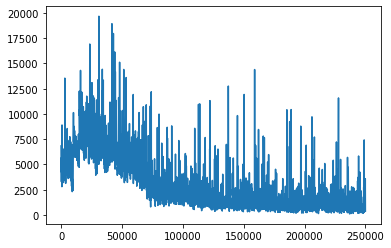

In [13]:
plt.plot(data_merge.groupby(by ='Salary')['AmtLastYear'].sum())

In [14]:
data_merge[data_merge['Salary']==0].count()

ID              576
LastName        576
FirstName       576
Woman           576
Age             576
Salary          576
Education       576
City            576
SeniorList      576
NbActivities    576
Referrals       576
Recency         209
Frequency       209
Seniority       209
TotalGift       209
MinGift         209
MaxGift         209
GaveLastYear    576
AmtLastYear     576
GaveThisYear    576
AmtThisYear     576
dtype: int64

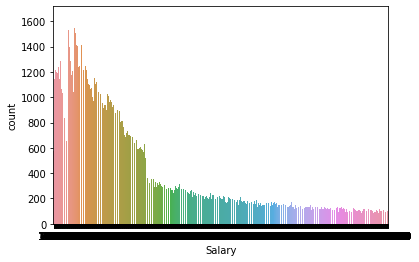

In [89]:
sns.countplot(x="Salary", data=data_merge)

In [15]:
corr=data_merge.corr()
corr.style.background_gradient()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
ID,1.000000,-0.002832,-0.000720,-0.000759,0.000815,0.001128,-0.000853,0.000345,-0.000086,-0.000401,-0.000664,-0.000120,-0.000692,-0.000741,0.000066,-0.000845,-0.002595
Woman,-0.002832,1.000000,0.037798,-0.046426,-0.000095,0.001681,-0.000138,-0.002042,-0.000370,-0.002443,0.028533,0.017376,0.028210,-0.000846,0.013658,-0.000691,0.014477
Age,-0.000720,0.037798,1.000000,0.019775,0.000349,0.000411,-0.002079,-0.000671,-0.000721,-0.001805,-0.028682,-0.016625,-0.028798,-0.001535,-0.013239,0.000379,-0.013522
Salary,-0.000759,-0.046426,0.019775,1.000000,-0.000195,0.000421,0.000426,-0.003451,0.000899,-0.001951,0.042084,0.027365,0.041842,0.001101,0.021870,0.001416,0.022055
SeniorList,0.000815,-0.000095,0.000349,-0.000195,1.000000,0.408294,0.385607,0.409977,0.408919,0.662898,0.137358,0.072734,0.112789,-0.000125,0.001313,-0.001315,-0.001249
NbActivities,0.001128,0.001681,0.000411,0.000421,0.408294,1.000000,0.527538,-0.041532,0.559797,0.337794,0.209275,0.069346,0.164265,0.172631,0.050613,0.169830,0.048435
Referrals,-0.000853,-0.000138,-0.002079,0.000426,0.385607,0.527538,1.000000,-0.038949,0.529110,0.313620,0.195753,0.065122,0.153312,0.160814,0.046003,0.159688,0.045224
Recency,0.000345,-0.002042,-0.000671,-0.003451,0.409977,-0.041532,-0.038949,1.000000,-0.265405,0.566351,-0.072300,0.019381,-0.048954,-0.085739,-0.020735,-0.087135,-0.023791
Frequency,-0.000086,-0.000370,-0.000721,0.000899,0.408919,0.559797,0.529110,-0.265405,1.000000,0.512804,0.357162,0.120413,0.278724,0.170735,0.048566,0.168921,0.048613
Seniority,-0.000401,-0.002443,-0.001805,-0.001951,0.662898,0.337794,0.313620,0.566351,0.512804,1.000000,0.117074,-0.068460,0.069522,0.036973,0.011420,0.034573,0.006719


In [12]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  
data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=0) 
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=0) 
data_merge[['Frequency']] = data_merge[['Frequency']].fillna(value=0) 
data_merge

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,...,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2999996.0,SCHUBERT,FRANCES,1.0,29.0,15100.0,High School,Suburban,8.0,3.0,...,5.0,1.0,5.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999996,2999997.0,LUGGE,MARY,1.0,22.0,7000.0,High School,Suburban,10.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999997,2999998.0,ROY,REGINALD,0.0,17.0,1000.0,High School,City,10.0,1.0,...,1.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999998,2999999.0,LIBERTI,PAMELA,1.0,32.0,43900.0,University / College,Rural,0.0,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_merge[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] )
data_merge[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] =scaler.transform(data_merge[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] )

## Data Partition

In [41]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
773949,2773950.0,STEWART,CECIL,0.0,46.0,0.060086,University / College,Suburban,9.0,-0.563214,...,1.0,1.444812,5.0,315.0,15.0,1.600469,-0.372939,-0.093318,0.0,0.0
405508,2405509.0,VARELA,LATASHA,1.0,78.0,-0.586913,University / College,City,0.0,-0.563214,...,NaN,-0.562748,NaN,0.0,0.0,-0.170552,-0.372939,-0.093318,0.0,0.0
654356,2654357.0,GIULIANO,ANN,1.0,24.0,-0.894851,University / College,Suburban,0.0,-0.563214,...,NaN,-0.562748,NaN,0.0,0.0,-0.170552,-0.372939,-0.093318,0.0,0.0
604511,2604512.0,DENISON,MARTY,1.0,54.0,1.747198,High School,Suburban,6.0,3.449619,...,1.0,0.441032,1.0,25.0,25.0,-0.022967,-0.372939,-0.093318,0.0,0.0
943969,2943970.0,CARREE,JAMES,0.0,58.0,2.228762,High School,City,5.0,1.443202,...,2.0,2.448592,5.0,150.0,30.0,0.242687,2.681407,0.149918,1.0,40.0
189914,2189915.0,BARLETTA,MARK,0.0,69.0,-0.783469,University / College,City,9.0,4.452827,...,2.0,2.448592,4.0,225.0,20.0,0.862544,-0.372939,-0.093318,0.0,0.0
389450,2389451.0,GINGERELLI,CHRIS,0.0,76.0,-0.026726,High School,City,9.0,3.449619,...,NaN,-0.562748,NaN,0.0,0.0,-0.170552,-0.372939,-0.093318,0.0,0.0
361946,2361947.0,PARKER,LEAH,1.0,90.0,-0.708123,High School,Suburban,0.0,-0.563214,...,NaN,-0.562748,NaN,0.0,0.0,-0.170552,-0.372939,-0.093318,0.0,0.0
933529,2933530.0,IGLESIAS,DIANA,1.0,50.0,1.945393,University / College,City,8.0,-0.563214,...,2.0,1.444812,7.0,50.0,10.0,0.065584,-0.372939,-0.093318,0.0,0.0
151556,2151557.0,LACY,TOBY,0.0,35.0,-0.274060,High School,Downtown,7.0,0.439994,...,1.0,0.441032,1.0,50.0,50.0,0.124618,-0.372939,-0.093318,0.0,0.0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [1]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities' ,'GaveLastYear']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities','GaveLastYear']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

NameError: ignored

In [37]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.288003475714971
7607.206593588198
87.21930172609844


## **Regression Tree Model**

In [42]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] 
Y_valid = validation['AmtThisYear']



{1: -0.8004291112367437, 2: -0.3138982246401947, 3: -0.19386766486563478, 4: -0.16643844072275815, 5: -0.1310523451382497, 6: -0.10651330722448438, 7: -0.0933036377528953, 8: -0.08332583951591666, 9: -0.07572514679288656, 10: -0.07023569166648858, 11: -0.06364031385857927, 12: -0.05604169996864483, 13: -0.05187284174464213, 14: -0.04697669236891677, 15: -0.04342386412880184}


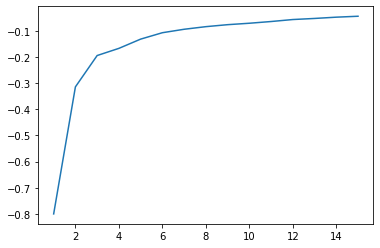

In [43]:
from sklearn.metrics import mean_squared_error
leaves= {}
xl, yl = [], []
for leaf in range(1,16):
    clf = DecisionTreeRegressor(random_state=42, min_samples_leaf = leaf)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    leaves[leaf] = mean_squared_error(Y_valid,y_pred)
    xl.append(leaf)
    yl.append(mean_squared_error(Y_valid,y_pred))

#MIN SAMPLE LEAF 6
print(leaves)
plt.plot(xl,yl)
plt.show()

{1: 0.0014398437024000232, 2: 0.002245628439081271, 3: 0.0023858505651296325, 4: 0.0007501170305080906, 5: -0.0006172281608285424, 6: -0.0006335230655563073, 7: -0.003542922076121169, 8: -0.007503651040264181, 9: -0.008999879982958259, 10: -0.014038849566838651, 11: -0.02137073967008174, 12: -0.027998625974263947, 13: -0.031706089404821336, 14: -0.03671670418591044, 15: -0.040191041322911625, 16: -0.04338477063566826, 17: -0.04604199013883825, 18: -0.047804259469014676, 19: -0.050540215593382065}


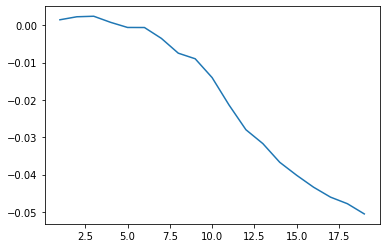

In [44]:
depths= {}
xd, yd = [], []
for depth in range(1,20):
    clf = DecisionTreeRegressor(random_state=42, min_samples_leaf = 12, max_depth=depth)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    depths[depth] = mean_squared_error(Y_valid,y_pred)
    xd.append(depth)
    yd.append(mean_squared_error(Y_valid,y_pred))


#DEPTH 3 FOR OPTIMAL
print(depths)
plt.plot(xd,yd)
plt.show()

In [45]:
DT_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=12, random_state=42).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data

In [46]:
import numpy as np
from sklearn import metrics

#En valid
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))
#R2
print(metrics.r2_score(Y_valid,DT_predict))

13.207689907190403
7617.891778409447
87.28053493425351
0.0023858505651296325


In [47]:
#En train
#you can change the criteria
DT_train=DT_model.predict(X_train)
#MAE
print(metrics.mean_absolute_error(Y_train,DT_train))
#MSE
print(metrics.mean_squared_error(Y_train,DT_train))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_train,DT_train)))
#R2
print(metrics.r2_score(Y_train,DT_train))

13.093038430211694
6395.957698316662
79.97473162391145
0.003979999346878427


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


##**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestRegressor
X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

RF= RandomForestRegressor()
RF_model=RF.fit(X_train,Y_train)
RF_predict = RF_model.predict(X_valid)



In [49]:
from sklearn import metrics
import numpy as np
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,RF_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,RF_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,RF_predict)))
#R2
print(metrics.r2_score(Y_valid,RF_predict))

14.943993994196973
8950.200049986714
94.60549693324757
-0.17208887574978093


## **Logistic regression**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

LR = make_pipeline(StandardScaler(), LogisticRegression(solver='sag'))
LR_model=LR.fit(X_train,Y_train)
LR_predict = LR_model.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [46]:
import numpy as np
from sklearn import metrics
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,LR_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,LR_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,LR_predict)))

7.8192
7824.06225
88.45372942957239


## **SGD REgressor**
52373.45008

In [44]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-9))
SGD_model=SGD.fit(X_train,Y_train)
SGD_predict = SGD_model.predict(X_valid)


In [45]:
from sklearn import metrics
import numpy as np
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,SGD_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,SGD_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,SGD_predict)))

13.069837749656402
7613.991277300903
87.2581874513842


##**Ridge**

In [89]:
from sklearn.linear_model import Ridge

X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

RD= Ridge(alpha=1)
RD_model=RD.fit(X_train,Y_train)
RD_predict = RD_model.predict(X_valid)

In [87]:
from re import A
from sklearn import metrics
import numpy as np
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,RD_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,RD_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,RD_predict)))


13.288003613129488
7607.2065928074935
87.21930172162291


## Scoring New Data

### Prepare data for scoring

In [20]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [22]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0) 
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0) 
scoring_data[['Frequency']] = scoring_data[['Frequency']].fillna(value=0) 

scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0


In [23]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Frequency','Salary','MaxGift', 'GaveLastYear','AmtLastYear','Referrals', 'NbActivities']] 
predict_end=DT_model.predict(X)

scoring_data['Prediction'] = predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
86763,2086764.0,1.0,1500.0,JEFFREYS,CARRIE,1.0,33.0,186000.0,High School,Suburban,7.0,3.0,2.0,2.0,1.0,2.0,2000.0,2000.0,2000.0,5375.000000
510112,2510113.0,1.0,750.0,TICE,MARY,1.0,25.0,185100.0,University / College,City,9.0,3.0,1.0,8.0,1.0,8.0,10.0,10.0,10.0,5375.000000
631673,2631674.0,1.0,10000.0,KOPPENHEFFER,JENNIFER,1.0,34.0,186500.0,University / College,City,9.0,3.0,1.0,0.0,1.0,0.0,500.0,500.0,500.0,5375.000000
478470,2478471.0,1.0,4000.0,WEBB,PHYLLIS,1.0,60.0,201600.0,University / College,City,10.0,1.0,2.0,0.0,8.0,8.0,815.0,10.0,300.0,4000.000000
906834,2906835.0,1.0,1000.0,RIVERA,HEATHER,1.0,22.0,31100.0,University / College,Suburban,9.0,2.0,0.0,1.0,3.0,4.0,45.0,10.0,20.0,626.944444


## Exporting Results to a CSV File

In [24]:
Result= scoring_data[['ID','Prediction']]
Result.shape

(1000000, 2)

In [25]:
Result=Result.loc[Result['Prediction'] != 0]
Result.shape
#Result.to_csv('Round1_Output.csv', index=False

(1000000, 2)

In [26]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 100000
submission = Result.head(NB)
submission.to_csv('Round1 Output DT5DP.csv', index=False)

In [37]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [55]:
!head Round1\ Output.csv

ID,Prediction
2420891.0,203.53100264852912
2631674.0,157.07423550309795
2334250.0,154.56589904654052
2954314.0,149.93662884564222
2416111.0,149.59033329198328
2100799.0,145.1098616263633
2094131.0,144.0934294771176
2132411.0,143.607439950489
2265980.0,143.60338124946452
